In [13]:
# 数据一
import pandas as pd
df_transaction = pd.read_csv('ndm_transaction_list_all_20230705.csv')


/var/folders/gj/bwfyx1ks0p17lbgn6fl1nx1c0000gp/T/ipykernel_93055/1956357708.py:3: DtypeWarning: Columns (69,83,110,121,122,123,124,125,128) have mixed types. Specify dtype option on import or set low_memory=False.
  df_transaction = pd.read_csv('ndm_transaction_list_all_20230705.csv')


In [14]:
import pandas as pd

# Load the data from the CSV file
df_transaction = pd.read_csv('ndm_transaction_list_all_20230705.csv')
df_transaction['nmnl_vol'] = df_transaction['nmnl_vol'] / 1000000
# Group by 'bond_cd' and count transactions, then reset index
bond_transactions = df_transaction.groupby('bond_cd').size().reset_index(name='Transaction num')

# Group by 'bond_cd' and get the first 'bnds_nm' value for each group
bonds_names = df_transaction.groupby('bond_cd')['bnds_nm'].first().reset_index()

# Group by 'bond_cd' and sum 'nmnl_vol' for each group
nmnl_vol_sum = df_transaction.groupby('bond_cd')['nmnl_vol'].sum().reset_index(name='Total nmnl_vol')

# Merge the DataFrames based on 'bond_cd'
result = pd.merge(bond_transactions, bonds_names, on='bond_cd')
result = pd.merge(result, nmnl_vol_sum, on='bond_cd')

# Sort by 'Transaction num' in descending order
result = result.sort_values(by='Transaction num', ascending=False)

# Print the result
print(result)


        bond_cd  Transaction num        bnds_nm  Total nmnl_vol
268      230205             1699         23国开05        56320.00
271      230210              850         23国开10        33172.00
267      230203              678         23国开03        24740.00
262      230012              550       23附息国债12        19351.52
254      230004              372       23附息国债04        14030.00
...         ...              ...            ...             ...
914    32280669                1   22西汇投资PPN001           10.00
913    32280643                1   22黄石城发PPN002            3.00
912    32280533                1   22新郑投资PPN003           20.00
911    32280528                1   22镇江交通PPN003           10.00
1851  272380007                1  23人民人寿资本补充债01          160.00

[1852 rows x 4 columns]


/var/folders/gj/bwfyx1ks0p17lbgn6fl1nx1c0000gp/T/ipykernel_93055/2826461807.py:4: DtypeWarning: Columns (69,83,110,121,122,123,124,125,128) have mixed types. Specify dtype option on import or set low_memory=False.
  df_transaction = pd.read_csv('ndm_transaction_list_all_20230705.csv')


In [15]:
import pandas as pd
# import matplotlib.pyplot as plt

# 读取CSV文件并筛选特定债券数据
# 有一列是net_prc，选取这一列的最大偏离行
data_df = pd.read_csv('ndm_transaction_list_all_20230705_nonzero.csv')
data = data_df[data_df['bond_cd'] == 230210]

# 计算均值和标准差
mean_net_prc = data['net_prc'].mean()
std_net_prc = data['net_prc'].std()

# 计算上下限
lower_limit = mean_net_prc - 3 * std_net_prc
upper_limit = mean_net_prc + 3 * std_net_prc

# 筛选出偏离平均值3倍标准差的异常行
outliers = data[(data['net_prc'] < lower_limit) | (data['net_prc'] > upper_limit)]

# 打印异常行
print("异常行：")
print(outliers)


异常行：
       Unnamed: 0              dl_cd      txn_dt                      dl_tm  \
2063         2063  CBT20230705310206  2023-07-05  2023-07-05 15:58:07+08:00   
2740         2740  CBT20230705309602  2023-07-05  2023-07-05 15:48:48+08:00   
5623         5623  CBT20230705306821  2023-07-05  2023-07-05 15:08:20+08:00   
5892         5892  CBT20230705306490  2023-07-05  2023-07-05 15:03:04+08:00   
7834         7834  CBT20230705303479  2023-07-05  2023-07-05 14:07:11+08:00   
7952         7952  CBT20230705303291  2023-07-05  2023-07-05 14:03:56+08:00   
8941         8941  CBT20230705303250  2023-07-05  2023-07-05 14:03:06+08:00   
8981         8981  CBT20230705302239  2023-07-05  2023-07-05 13:42:35+08:00   
9140         9140  CBT20230705303280  2023-07-05  2023-07-05 14:03:44+08:00   
9162         9162  CBT20230705303274  2023-07-05  2023-07-05 14:03:39+08:00   
9336         9336  CBT20230705302811  2023-07-05  2023-07-05 13:53:01+08:00   
9382         9382  CBT20230705301843  2023-07-0

/var/folders/gj/bwfyx1ks0p17lbgn6fl1nx1c0000gp/T/ipykernel_93055/781830094.py:5: DtypeWarning: Columns (69,83,110,121,122,123,124,125,128) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('ndm_transaction_list_all_20230705.csv')
/var/folders/gj/bwfyx1ks0p17lbgn6fl1nx1c0000gp/T/ipykernel_93055/781830094.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['timeStamp'] = pd.to_datetime(filtered_data['dl_tm'])


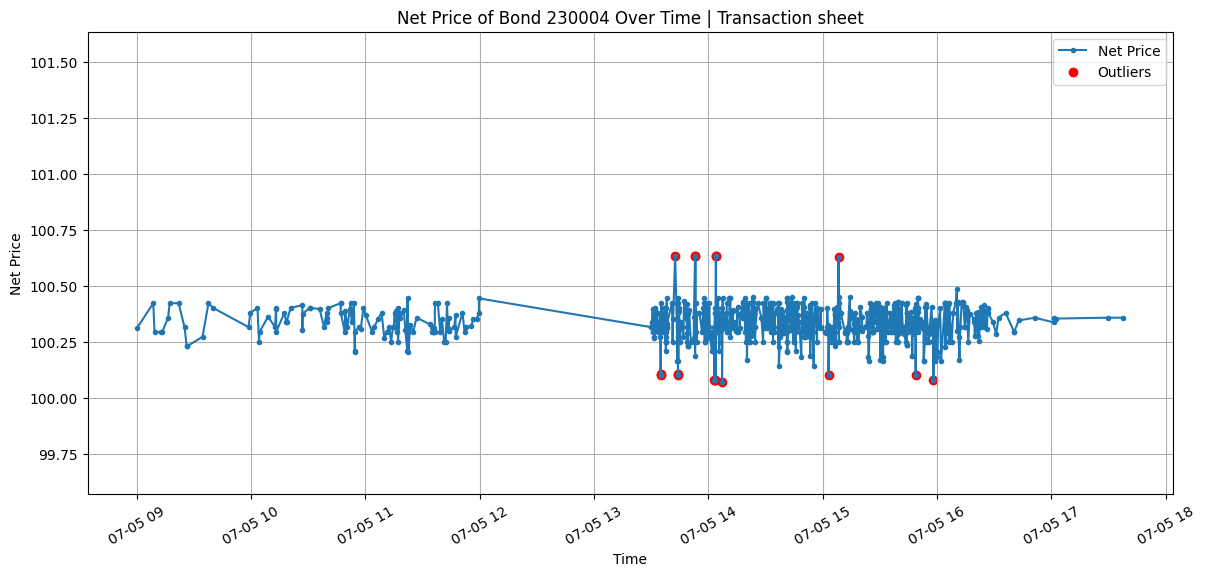

In [16]:
import pandas as pd
import matplotlib.pyplot as plt

# 读取CSV文件并筛选特定债券数据
data = pd.read_csv('ndm_transaction_list_all_20230705.csv')
filtered_data = data[data['bond_cd'] == 230210]

# 转换时间戳格式
filtered_data['timeStamp'] = pd.to_datetime(filtered_data['dl_tm'])

# 排序
sorted_data = filtered_data.sort_values(by='timeStamp', ascending=True)

# 计算均值和标准差
mean_net_prc = sorted_data['net_prc'].mean()
std_net_prc = sorted_data['net_prc'].std()

# 计算上下限
lower_limit = mean_net_prc - 3 * std_net_prc
upper_limit = mean_net_prc + 3 * std_net_prc

# 筛选出偏离平均值3倍标准差的异常行
outliers = sorted_data[(sorted_data['net_prc'] < lower_limit) | (sorted_data['net_prc'] > upper_limit)]

# 创建绘图
plt.figure(figsize=(14, 6))
plt.plot(sorted_data['timeStamp'], sorted_data['net_prc'], marker='o', markersize=3, label='Net Price')
plt.scatter(outliers['timeStamp'], outliers['net_prc'], color='red', label='Outliers')  # 添加异常值的红色点
plt.xlabel('Time')
plt.ylabel('Net Price')
plt.title('Net Price of Bond 230004 Over Time | Transaction sheet')
plt.xticks(rotation=30)
plt.grid(True)

# 调整 y 轴范围
plt.ylim(min(sorted_data['net_prc']) - 0.5, max(sorted_data['net_prc']) + 1)

# 添加图例
plt.legend()

plt.show()


In [17]:
outliers.to_csv("outliers.csv")


In [18]:
# 对于这些异常交易的Seller和buyer，希望分别找到这些机构历史上的投资item
# 以上机构所在所在为byr_instn_cd所在列
# 也就是说通过筛的方法筛出含有以上机构的交易。并对这些交易进行标记，如果该机构是buyer，那么记为‘buyer’，如果该机构是seller，那么记为‘seller’，


/var/folders/gj/bwfyx1ks0p17lbgn6fl1nx1c0000gp/T/ipykernel_93055/3189532825.py:13: DtypeWarning: Columns (69,83,110,121,122,123,124,125,128) have mixed types. Specify dtype option on import or set low_memory=False.
  full_data = pd.read_csv('ndm_transaction_list_all_20230705.csv')
/var/folders/gj/bwfyx1ks0p17lbgn6fl1nx1c0000gp/T/ipykernel_93055/3189532825.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['timeStamp'] = pd.to_datetime(filtered_data['dl_tm'])
/var/folders/gj/bwfyx1ks0p17lbgn6fl1nx1c0000gp/T/ipykernel_93055/3189532825.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https:/

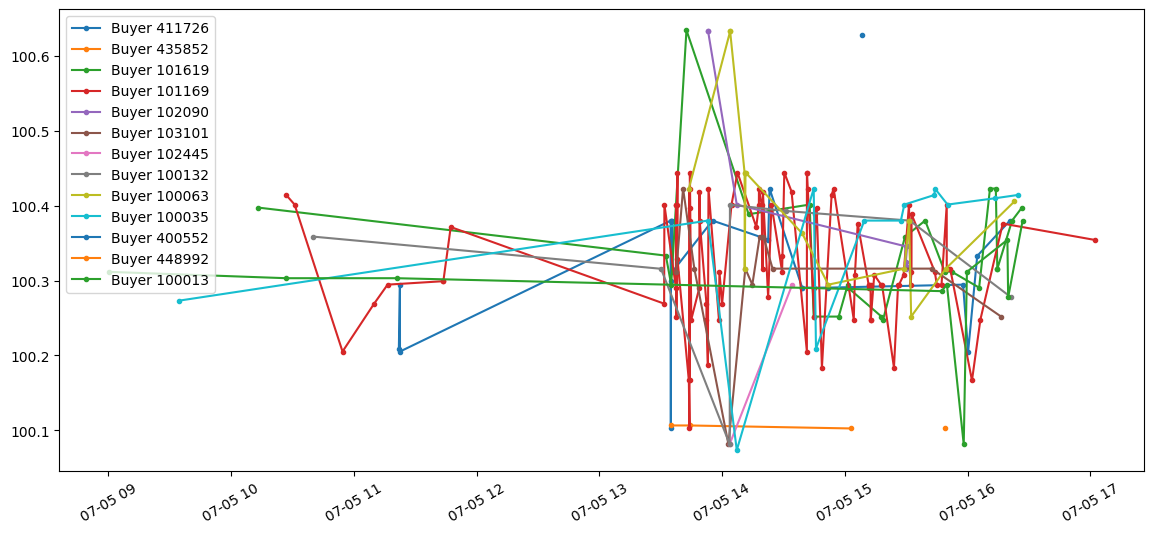

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
# import pytz  # Import pytz module for handling timezones

# 读取异常值数据
outliers = pd.read_csv('outliers.csv')

# 提取包含异常值的交易的买方和卖方机构代码
buyer_codes = outliers['buy_side_trdng_acnt_cd'].unique()
seller_codes = outliers['sell_side_trdng_acnt_cd'].unique()

# 读取完整的数据集
full_data = pd.read_csv('ndm_transaction_list_all_20230705.csv')
filtered_data = full_data[full_data['bond_cd'] == 230210]

# 转换时间戳格式
filtered_data['timeStamp'] = pd.to_datetime(filtered_data['dl_tm'])

# 排序
sorted_data = filtered_data.sort_values(by='timeStamp', ascending=True)

# 创建绘图
plt.figure(figsize=(14, 6))

# 画出买方的线图
for code in buyer_codes:
    buyer_investments = sorted_data[sorted_data['buy_side_trdng_acnt_cd'] == code]
    buyer_investments['role'] = 'buyer'
    plt.plot(buyer_investments['timeStamp'], buyer_investments['net_prc'], marker='o', markersize=3, label=f'Buyer {code}')
    plt.xticks(rotation=30)

plt.legend()

plt.show()


In [20]:
import json
json_filename = 'instn_data.json'

# 从JSON文件中导入数据
with open(json_filename, 'r') as json_file:
    loaded_instn_dict = json.load(json_file)

In [21]:
# 针对所有的buy和seller去对应到它们的类型

In [22]:
# sorted_data 有两列，一列是byr_instn_cd， slr_instn_cd，所以针对每一列来说有两个类型
# 分别是byr的类型以及 slr的类型，通过loaded_instn_dict来得到他们的类型 就是byr_instn_tp = loaded_instn_dict[byr_instn_cd]
# slr_instn_tp = loaded_instn_dict[slr_instn_cd]

# 获取 byr_instn_cd 和 slr_instn_cd 对应的类型
sorted_data['byr_instn_tp'] = sorted_data['byr_instn_cd'].map(lambda x: loaded_instn_dict[x]['instn_tp'])
sorted_data['slr_instn_tp'] = sorted_data['slr_instn_cd'].map(lambda x: loaded_instn_dict[x]['instn_tp'])


KeyError: 100013

In [23]:
sorted_data['byr_instn_cd']

12296    100013
12386    100374
12297    100374
12264    301455
12340    101852
          ...  
242      102951
261      400511
88       101169
30       101180
73       101180
Name: byr_instn_cd, Length: 850, dtype: int64

In [24]:
import pandas as pd

# 示例 loaded_instn_dict
loaded_instn_dict = {
    '443066': {'instn_tp': '企业', 'instn_cn_full_nm': '徐州工程机械集团有限公司', 'instn_cn_shrt_nm': None},
    '406403': {'instn_tp': '企业', 'instn_cn_full_nm': '威海蓝创建设投资有限公司', 'instn_cn_shrt_nm': None},
    # 其他键值对
}

# 示例 sorted_data
sorted_data = pd.DataFrame({
    'byr_instn_cd': ['443066', '406403', '443066'],
    'slr_instn_cd': ['406403', '443066', '406403'],
    # 其他列
})

# 获取 byr_instn_cd 和 slr_instn_cd 对应的类型
sorted_data['byr_instn_tp'] = sorted_data['byr_instn_cd'].map(lambda x: loaded_instn_dict[x]['instn_tp'])
sorted_data['slr_instn_tp'] = sorted_data['slr_instn_cd'].map(lambda x: loaded_instn_dict[x]['instn_tp'])

# 打印结果
print(sorted_data)


  byr_instn_cd slr_instn_cd byr_instn_tp slr_instn_tp
0       443066       406403           企业           企业
1       406403       443066           企业           企业
2       443066       406403           企业           企业
